In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/iggixplyqf.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/mppjpwwcom.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/fvcqerfgfa.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/jjycletzyl.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/qooxnxqqjb.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/yeemuaroyj.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/qiyzfjrloz.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/htrkeemhkr.mp4
/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/cugumlyhiu.mp4
/kaggle/input/deepf

In [2]:
!pip install cmake==3.28.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 64.7 MB/s eta 0:00:00


In [3]:
!pip install dlib==19.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for dlib: filename=dlib-19.9.0-cp310-cp310-linux_x86_64.whl size=1964362 sha256=1b6d4b05e06595df26a037334bdae9a13bbeeb308bf451d7aa75a813d501ac22
  Stored in directory: /root/.cache/pip/wheels/d0/b7/05/fc26c5953d52eaba4223fdde3ca6bfe42a98ca1581e6702267
Successfully built dlib


In [4]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566163 sha256=a2ec0e0748454850b292ba40aa79a9a077b08f18d246bfaf9b4b9dba64849028
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [5]:
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.notebook import tqdm

#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 100
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames

#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

video_files =  glob.glob('/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/Celeb_real_face_only-20241104T042851Z-001/Celeb_real_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/DFDC_FAKE_Face_only_data-20241104T042657Z-001/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/FF_Face_only_data-20241104T042243Z-001/FF_Face_only_data/*.mp4')

print("Total no of videos :" , len(video_files))
print(video_files)
count = 0;
for i in video_files:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_files) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_files) - count))

Total no of videos : 6450
['/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id52_id49_0008.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id39_id42_0007.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id59_id61_0007.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id21_id26_0009.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id61_id60_0005.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id56_id49_0006.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id11_id7_0001.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id30_id32_0004.mp4', '/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/id29_id31_0003.mp4', '/

In [6]:
print("Total videos found:", len(video_files))

Total videos found: 6450


In [7]:
#to load preprocessod video to memory
import json
import copy
import random

video_files =  glob.glob('/kaggle/input/deepfake/Celeb_fake_face_only-20241104T042108Z-001/Celeb_fake_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/Celeb_real_face_only-20241104T042851Z-001/Celeb_real_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/DFDC_FAKE_Face_only_data-20241104T042657Z-001/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/DFDC_REAL_Face_only_data-20241104T042713Z-001/DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake/FF_Face_only_data-20241104T042243Z-001/FF_Face_only_data/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 146, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 124, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [8]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image

#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()
     

In [9]:
def number_of_real_and_fake_videos(data_list):
    header_list = ["file", "label"]
    lab = pd.read_csv('/kaggle/input/metadata/Gobal_metadata.csv', names=header_list)
    fake_count = 0
    real_count = 0
    real_videos = []
    fake_videos = []

    # Loop through each video in the provided data list
    for i in data_list:
        temp_video = i.split('/')[-1]  # Extract the video filename
        label = lab.iloc[(lab.loc[lab["file"] == temp_video].index.values[0]), 1]  # Get the label

        # Check if the video is real or fake and update counts and lists
        if label == 'FAKE':
            fake_count += 1
            fake_videos.append(temp_video)  # Append to fake videos list
        elif label == 'REAL':
            real_count += 1
            real_videos.append(temp_video)  # Append to real videos list
    
    # Return counts and lists of video filenames
    return real_count, fake_count, real_videos, fake_videos


train :  5141
test :  1286
TRAIN: Real count: 2629 Fake count: 2512
TEST: Real count: 672 Fake count: 614


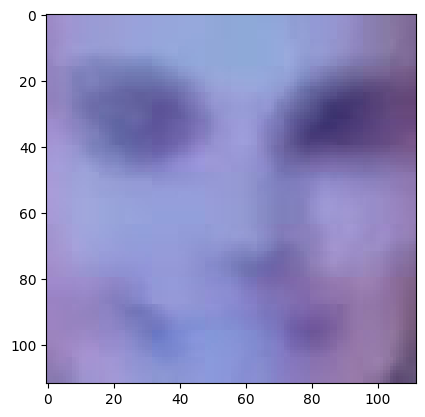

In [10]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# video_files = video_fil

header_list = ["file","label"]
labels = pd.read_csv('/kaggle/input/metadata/Gobal_metadata.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

real_train_count, fake_train_count, real_train_videos, fake_train_videos = number_of_real_and_fake_videos(train_videos)
# Print the counts
print("TRAIN: Real count:",real_train_count, "Fake count:", fake_train_count)


real_count, fake_count, real_videos, fake_videos = number_of_real_and_fake_videos(valid_videos)
# Print the counts
print("TEST: Real count:", real_count, "Fake count:", fake_count)


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(train_videos,labels,sequence_length = 100,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 100,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [11]:
# Print the lists of real and fake videos in test
real_videos_df = pd.DataFrame(real_videos, columns=['file'])
print(real_videos_df)
fake_videos_df = pd.DataFrame(fake_videos, columns=['file'])
print(fake_videos_df)

               file
0    ioitqcvyuk.mp4
1    fuusxfhmrc.mp4
2    xlzhzudnny.mp4
3           834.mp4
4     id58_0001.mp4
..              ...
667   id44_0001.mp4
668  tzmithsdcj.mp4
669    id6_0007.mp4
670   id55_0006.mp4
671   id35_0006.mp4

[672 rows x 1 columns]
                   file
0    id56_id55_0009.mp4
1           035_036.mp4
2           053_095.mp4
3    id50_id57_0004.mp4
4        efjwcpgxdh.mp4
..                  ...
609      cwmahupvmg.mp4
610      ajalgtjhgp.mp4
611      clwkkqwozj.mp4
612         439_441.mp4
613         993_989.mp4

[614 rows x 1 columns]


In [12]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))
     

In [13]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 162MB/s]


In [14]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/kaggle/working/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1) 
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size
     

In [15]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    accuracy = round(calculated_acc*100,2)
    print("Calculated Accuracy",calculated_acc*100)
    return accuracy

In [16]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [17]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, path='best_model.pt', verbose=False):
        """
        Args:
            patience (int): How many epochs to wait after last improvement.
            delta (float): Minimum change to qualify as an improvement.
            path (str): Path to save the best model.
            verbose (bool): If True, prints a message for each improvement.
        """
        self.patience = patience
        self.delta = delta
        self.path = path
        self.verbose = verbose
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decreases."""
        if self.verbose:
            print(f"Validation loss decreased. Saving model to {self.path}")
        torch.save(model.state_dict(), self.path)


[Epoch 1/20] [Batch 1285 / 1286] [Loss: 0.617917, Acc: 67.61%]Testing
[Batch 321 / 322]  [Loss: 0.414003, Acc: 81.18%]
Accuracy 81.18195956454122
Validation loss decreased. Saving model to /kaggle/working/best_model.pt
[Epoch 2/20] [Batch 1285 / 1286] [Loss: 0.503020, Acc: 78.60%]Testing
[Batch 321 / 322]  [Loss: 0.342839, Acc: 86.94%]
Accuracy 86.93623639191291
Validation loss decreased. Saving model to /kaggle/working/best_model.pt
[Epoch 3/20] [Batch 1285 / 1286] [Loss: 0.441378, Acc: 83.12%]Testing
[Batch 321 / 322]  [Loss: 0.272912, Acc: 89.35%]
Accuracy 89.34681181959564
Validation loss decreased. Saving model to /kaggle/working/best_model.pt
[Epoch 4/20] [Batch 1285 / 1286] [Loss: 0.398003, Acc: 85.96%]Testing
[Batch 321 / 322]  [Loss: 0.267142, Acc: 89.27%]
Accuracy 89.26905132192846
Validation loss decreased. Saving model to /kaggle/working/best_model.pt
[Epoch 5/20] [Batch 1285 / 1286] [Loss: 0.359708, Acc: 88.76%]Testing
[Batch 321 / 322]  [Loss: 0.257206, Acc: 89.35%]
Accur

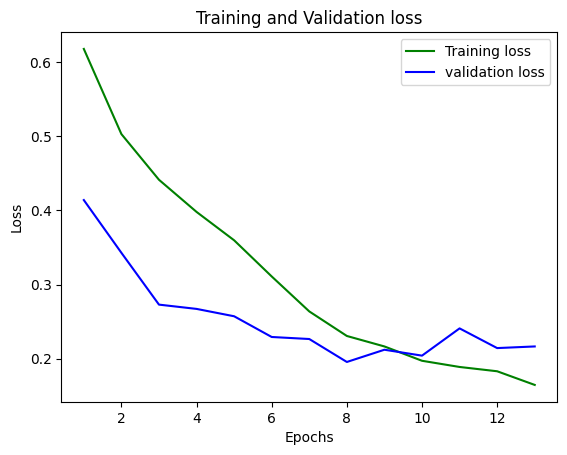

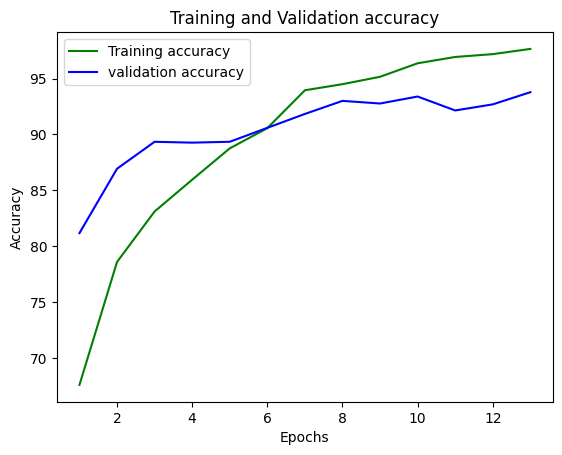

[[577  37]
 [ 43 629]]
True positive =  577
False positive =  37
False negative =  43
True negative =  629




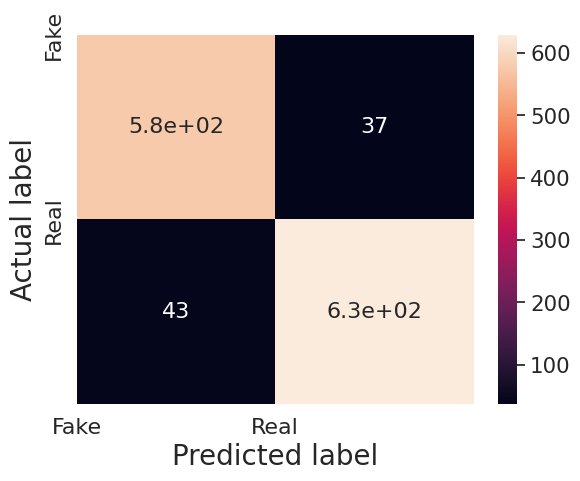

Calculated Accuracy 93.7791601866252


In [18]:
from sklearn.metrics import confusion_matrix

# learning rate
lr = 1e-5  # 0.001
# number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

# Using CrossEntropyLoss without class weights here
criterion = nn.CrossEntropyLoss().cuda()
# class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
# criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()

train_loss_avg = []
train_accuracy = []
test_loss_avg = []
test_accuracy = []

# Initialize EarlyStopping
early_stopping = EarlyStopping(patience=5, verbose=True, path='/kaggle/working/best_model.pt')

for epoch in range(1, num_epochs + 1):
    # Training step
    l, acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    
    # Validation step
    true, pred, tl, t_acc = test(epoch, model, valid_loader, criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
    
    
    # Early stopping check
    early_stopping(tl, model)
    
    # If early stopping is triggered, break out of the loop
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break
plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))
# Confusion matrix
print(confusion_matrix(true, pred))
accuracy = print_confusion_matrix(true, pred)

In [19]:
num_frames = 100
filename = f"/kaggle/working/model_{accuracy}_acc_{num_frames}_frames_final_data.pt"

In [20]:
# Save the model state
torch.save(model.state_dict(), filename)

In [21]:
import shutil

# Define the model file path
model_file_path = f"/kaggle/working/model_{accuracy}_acc_{num_frames}_frames_final_data.pt"

# Define the zip file path
zip_file_path = "/kaggle/working/model_100_frame_1.zip"

# Create a zip file containing the model file
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', '/kaggle/working', f'model_{accuracy}_acc_{num_frames}_frames_final_data.pt')


'/kaggle/working/model_100_frame_1.zip'